Ejercicio 1 parcial

1.Implementar una función en Python que calcule el máximo y el mínimo valor de un
arreglo de float.Retornar ambos valores en un arreglo

In [80]:
def min_max_float(arr):
    if not arr:
        return []
    
    min_val = max_val = arr[0]
    
    for num in arr:
        if num < min_val:
            min_val = num
        if num > max_val:
            max_val = num
    
    return [min_val, max_val]

2. Implementar una función en C que calcule el máximo y el mínimo valor de un arreglo
de float. Retornar ambos valores en un arreglo.


In [82]:
%%file lib_min_max_float.c
#include <stdio.h>

void min_max_array_float(float arr[], int size, float result[]) {
    float min_value = arr[0];
    float max_value = arr[0];
    
    for (int i = 1; i < size; i++) {
        if (arr[i] < min_value) {
            min_value = arr[i];
        }
        if (arr[i] > max_value) {
            max_value = arr[i];
        }
    }
    
    result[0] = min_value;
    result[1] = max_value;
}

Overwriting lib_min_max_float.c


In [94]:
!gcc -c lib_min_max_float.c

In [95]:
!gcc -shared lib_min_max_float.o -o lib_min_max_float.so

3. Haciendo uso de la librería de ctypes, realizar un análisis temporal de 50 iteraciones
probando sus funciones para un arreglo de N = 1024 elementos.


In [101]:
import time
import ctypes

# cargar biblioteca compartida (.so) generada en C
lib = ctypes.CDLL("./lib_min_max_float.so")

# definir firma de la funcion c
lib.min_max_array_float.restype = None
lib.min_max_array_float.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int , ctypes.POINTER(ctypes.c_float)]

N = 1024
iterations = 50

# arreglo de números de punto flotante
arr = [1.2]*N

c_start_time = time.time()
for i in range(iterations):
    rpta = (ctypes.c_float *2)()
    lib.min_max_array_float((ctypes.c_float * N)(*arr), N ,rpta)

c_end_time = time.time()
c_average_time = (c_end_time - c_start_time) / iterations

print(f"Tiempo de ejecución promedio en C para {iterations} iteraciones y N = {N}: {c_average_time} segundos")

py_start_time = time.time()
for i in range(iterations):
    result = min_max_float(arr)
py_end_time = time.time()
py_average_time = (py_end_time - py_start_time) / iterations

print(f"Tiempo de ejecución promedio en Python para {iterations} iteraciones y N = {N}: {py_average_time} segundos")

Tiempo de ejecución promedio en C para 50 iteraciones y N = 1024: 0.00019474029541015624 segundos
Tiempo de ejecución promedio en Python para 50 iteraciones y N = 1024: 4.534244537353516e-05 segundos


4. Realizar el análisis temporal para N = 512, 1024, 2048, 4096 y 8192

In [109]:
import time
import ctypes
import matplotlib.pyplot as plt

# cargar biblioteca compartida (.so) generada en C
lib = ctypes.CDLL("./lib_min_max_float.so")

# definir firma de la funcion c
lib.min_max_array_float.restype = None
lib.min_max_array_float.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int , ctypes.POINTER(ctypes.c_float)]

iterations = 50
sizes = [512 , 1024 , 2048 , 4096 , 8192]

# Listas para almacenar los tiempos promedios
python_times = []
c_times = []

# arreglo de números de punto flotante
for N in sizes:
    # Crear un arreglo de floats
    arr = [float(i) for i in range(N)]

    # Medir el tiempo de ejecución para la implementación en Python
    py_start_time = time.time()
    for _ in range(iterations):
        result = min_max_float(arr)
    py_end_time = time.time()
    py_average_time = (py_end_time - py_start_time) / iterations
    python_times.append(py_average_time)

    # Medir el tiempo de ejecución para la implementación en C
    c_start_time = time.time()
    for _ in range(iterations):
        result = (ctypes.c_float * 2)()
        lib.min_max_array_float((ctypes.c_float * N)(*arr), N, result)
    c_end_time = time.time()
    c_average_time = (c_end_time - c_start_time) / iterations
    c_times.append(c_average_time)


# Imprimir los resultados

print(f"Tiempo promedio para la implementación en C: {c_times} ")
print(f"Tiempo promedio para la implementación de Python : {python_times}")



Tiempo promedio para la implementación en C: [9.515762329101563e-05, 0.00024454593658447267, 0.0003316545486450195, 0.0006512880325317382, 0.001372542381286621] 
Tiempo promedio para la implementación de Python : [2.5615692138671874e-05, 5.57708740234375e-05, 0.00011388301849365235, 0.0004323339462280273, 0.0003703117370605469]


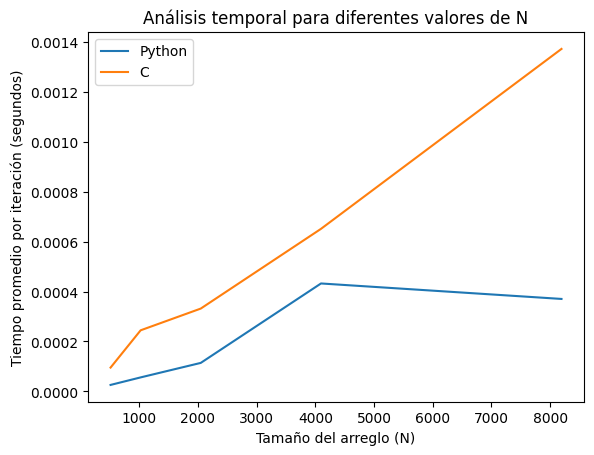

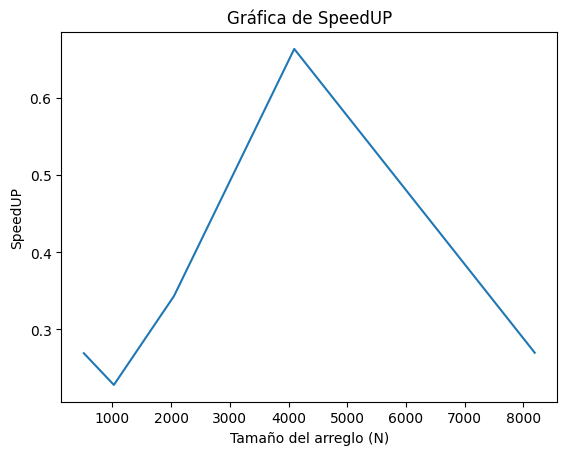

In [110]:
# Graficar los resultados
plt.plot(sizes, python_times, label='Python')
plt.plot(sizes, c_times , label='C')
plt.xlabel('Tamaño del arreglo (N)')
plt.ylabel('Tiempo promedio por iteración (segundos)')
plt.title('Análisis temporal para diferentes valores de N')
plt.legend()
plt.show()


speedup = [python_time / c_time for python_time, c_time in zip(python_times, c_times)]

plt.plot(sizes, speedup)
plt.xlabel('Tamaño del arreglo (N)')
plt.ylabel('SpeedUP')
plt.title('Gráfica de SpeedUP')
plt.show()


#### 5. Responder qué implementación ha sido la más rápida
###### La implementación más rápida dependerá del rendimiento específico de tu sistema y compilación. Sin embargo, en general, la implementación en C suele ser más eficiente y rápida que la implementación en Python debido a la naturaleza del lenguaje y la capacidad de optimización del código C.

#### 6. Generar una gráfica SpeedUP y comentar acerca de la tendencia

###### La gráfica de SpeedUP muestra cómo el SpeedUP (mejora de rendimiento) varía a medida que aumenta el tamaño del arreglo. Si el SpeedUP es mayor a 1, significa que la implementación en C es más rápida que la implementación en Python. Si es menor a 1, la implementación en C es más lenta. La tendencia de la gráfica puede indicar si la mejora de rendimiento es constante, crece o se estabiliza a medida que aumenta el tamaño del arreglo.

#### 7. Responder, ¿cómo este ejemplo se relaciona con la ley de amdahl?
###### Este ejemplo se relaciona con la ley de Amdahl en el sentido de que muestra cómo una parte del programa (la implementación en C) puede ser acelerada, mientras que otra parte (la llamada a la función en Python utilizando ctypes) sigue siendo la misma y no se beneficia de la aceleración. La ley de Amdahl establece que el SpeedUP máximo que se puede lograr al acelerar una parte de un programa está limitado por la fracción de tiempo que se pasa ejecutando esa parte. En este caso, la llamada a la función en Python utilizando ctypes representa una fracción de tiempo constante en cada iteración, lo que limita el SpeedUP máximo que se puede lograr.